### Load in the DataFrame

The data is stored in profiles.csv. We can start to work with it in dating.py by using Pandas, which we have imported for you with the line:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Explore the Data
Let’s make sure we understand what these columns represent!

Pick some columns and call .head() on them to see the first five rows of data.

In [2]:
df = pd.read_csv("profiles.csv")

In [6]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [8]:
df.diet.head()

0    strictly anything
1         mostly other
2             anything
3           vegetarian
4                  NaN
Name: diet, dtype: object

In [9]:
df.drinks.head()

0    socially
1       often
2    socially
3    socially
4    socially
Name: drinks, dtype: object

In [10]:
df.income.head()

0       -1
1    80000
2       -1
3    20000
4       -1
Name: income, dtype: int64

In [11]:
df.offspring.head()

0    doesn&rsquo;t have kids, but might want them
1    doesn&rsquo;t have kids, but might want them
2                                             NaN
3                         doesn&rsquo;t want kids
4                                             NaN
Name: offspring, dtype: object

In [12]:
df.offspring.value_counts()

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64

### Visualize some of the Data

For example, we were curious about the distribution of ages on the site, so we made a histogram of the age column:

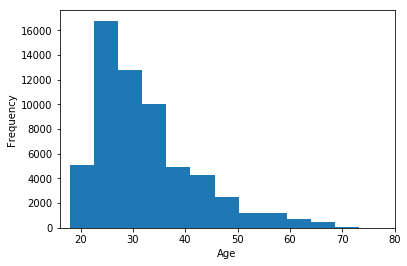

In [13]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

### Formulate a Question
As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:

In [14]:
df.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

We started to wonder if there was a way to predict a user’s Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

### Augment your Data
In order to answer the question you’ve formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. diet consists of the options vegan, vegetarian, anything, etc. instead of numerical values).

Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.

For our question about Zodiac signs, we wanted to transform the drinks column into numerical data. We used:

In [16]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}

df["drinks_code"] = df.drinks.map(drink_mapping)

In [18]:
df.drinks_code.value_counts()

2.0    41780
1.0     5957
3.0     5164
0.0     3267
4.0      471
5.0      322
Name: drinks_code, dtype: int64

We did the same for smokes and drugs

In [24]:
smokes_mapping = {"no": 0, "when drinking": 1, "trying to quit": 2, "sometimes": 3, "yes": 4}
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}

df["smokes_code"] = df.smokes.map(smokes_mapping)
df["drugs_code"] = df.drugs.map(drugs_mapping)

In [26]:
df.smokes_code.value_counts()

0.0    43896
3.0     3787
1.0     3040
4.0     2231
2.0     1480
Name: smokes_code, dtype: int64

We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the NaNs, and then created a new column called essay_len:

In [28]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x))

We also created a column with average word length and a column with the frequency of the words “I” or “me” appearing in the essays.

In [32]:
df["essay1"].head()

0    currently working as an international agent fo...
1    dedicating everyday to being an unbelievable b...
2    i make nerdy software for musicians, artists, ...
3            reading things written by old dead people
4                           work work work work + play
Name: essay1, dtype: object

### Normalize your Data
In order to get accurate results, we should make sure our numerical data all has the same weight.

For our Zodiac features, we used: